## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


## Exploratory Data Analysis

<Axes: xlabel='Cancer Present', ylabel='count'>

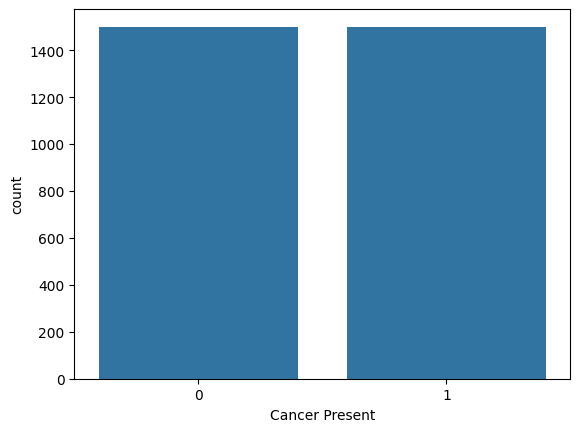

In [7]:
sns.countplot(data=df, x='Cancer Present')

<Axes: xlabel='Gene One', ylabel='Gene Two'>

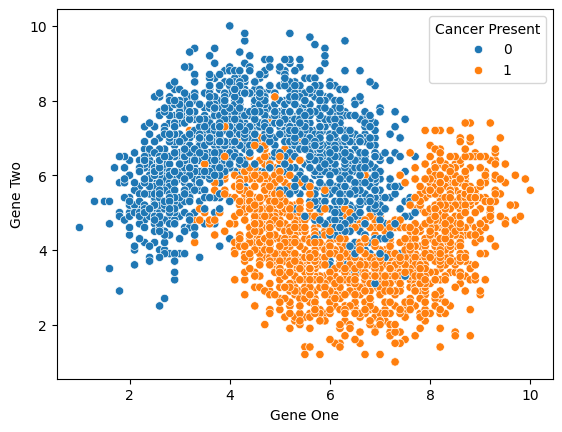

In [8]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

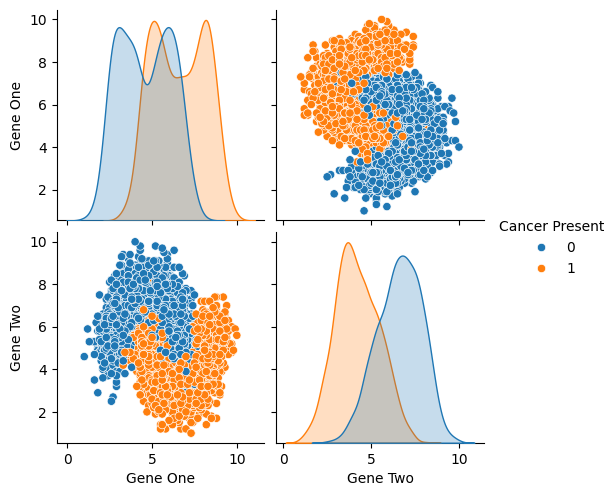

In [9]:
sns.pairplot(data=df, hue='Cancer Present')

## Separating X and Y

In [10]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Preprocessing

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Creation

In [13]:
model = KNeighborsClassifier(n_neighbors=1)

In [14]:
model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Prediction and Evaluation

In [15]:
prediction = model.predict(scaled_X_test)

In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



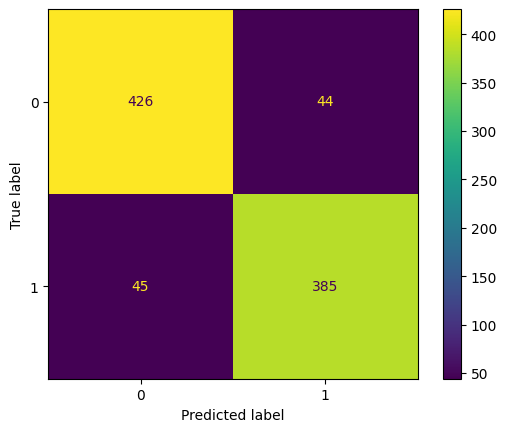

In [17]:
matrix = confusion_matrix(y_test, prediction)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [18]:
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
print(f"Recall Score: {recall_score(y_test, prediction)}")
print(f"F1 Score: {f1_score(y_test, prediction)}")

Accuracy Score: 0.9011111111111111
Precision Score: 0.8974358974358975
Recall Score: 0.8953488372093024
F1 Score: 0.8963911525029103


## Choosing K Value

### Method 1: Elbow Method

In [19]:
test_error_rates = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    
    prediction = model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, prediction)
    
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

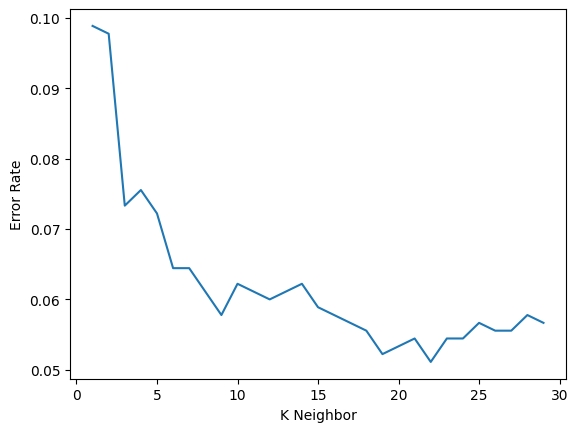

In [20]:
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K Neighbor')
plt.ylabel('Error Rate')

### Method 2: Grid Search with Pipeline method

In [21]:
scaler = StandardScaler()

In [22]:
model = KNeighborsClassifier()

In [23]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations = [('scaler', scaler), ('model', model)]

In [25]:
pipe = Pipeline(operations)

In [26]:
k_values = list(range(1, 30))

In [27]:
param_grid = {'model__n_neighbors':k_values}

In [28]:
grid_model = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [29]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29]},
             scoring='accuracy')

In [30]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 20,
 'model__p': 2,
 'model__weights': 'uniform'}

In [31]:
grid_predictions = grid_model.predict(X_test)

In [32]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



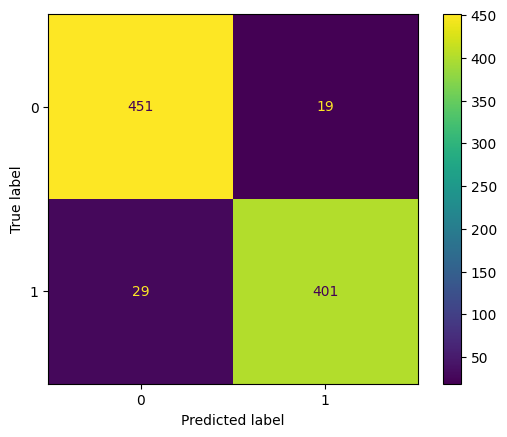

In [33]:
matrix = confusion_matrix(y_test, grid_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [34]:
print(f"Accuracy Score: {accuracy_score(y_test, grid_predictions)}")
print(f"Precision Score: {precision_score(y_test, grid_predictions)}")
print(f"Recall Score: {recall_score(y_test, grid_predictions)}")
print(f"F1 Score: {f1_score(y_test, grid_predictions)}")

Accuracy Score: 0.9466666666666667
Precision Score: 0.9547619047619048
Recall Score: 0.9325581395348838
F1 Score: 0.9435294117647058


## Predicting New Data

In [35]:
new_patient = [[3.8, 6.4]]

In [36]:
grid_model.predict(new_patient)

array([0])

In [37]:
grid_model.predict_proba(new_patient)

array([[0.9, 0.1]])